# Convex Hull problem

##### INPUT: Q ( the set of points )
##### OUTPUT: CH(Q) ( set of points in the convex hull)

Generating some random points for the problem to create the Q:

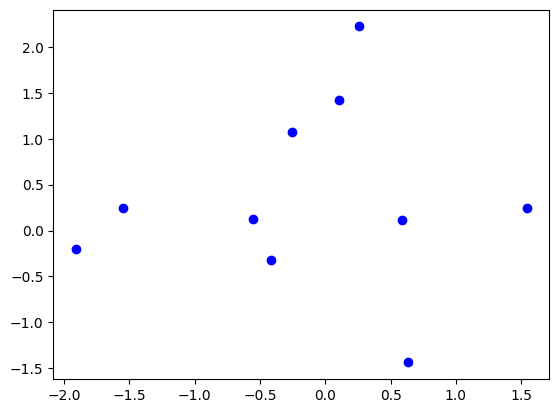

In [29]:
import matplotlib.pyplot as plt
import numpy as np

n = 10

X = np.random.randn(n)
Y = np.random.randn(n)

Q = []

# centerX = 0
# centerY = 0
# radius = 10
# theta = np.linspace(0, 2*np.pi, n)

for i in range(n):
    Q.append((X[i],Y[i]))
    # X = centerX + radius*np.cos(theta[i])
    # Y = centerY + radius*np.sin(theta[i])
    # Q.append((X,Y))


plt.scatter([x for x,y in Q], [y for x,y in Q], color='blue')
plt.show()

In [30]:
import math

# To find the distance between a point and a line
def dist(point, line_start, line_end):
    x1, y1 = line_start
    x2, y2 = line_end
    x0, y0 = point

    numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
    denominator = math.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)

    distance = numerator / denominator
    # print("distance: ", distance)
    return distance

# To find the extreme points in the given set of points according to x coordinates
def find_extreme_x_points(Qpoints):
    # print("find_extreme_x_points")
    # Qpoints.min(key=lambda x: x[0])
    # Qpoints.max(key=lambda x: x[0])
    min_x =  min(Qpoints, key=lambda x: x[0])
    max_x =  max(Qpoints, key=lambda x: x[0])
    return [min_x, max_x]

# To find the extreme points in the given set of points according to y coordinates
def find_extreme_y_points(Qpoints):
    # print("find_extreme_y_points")
    # Qpoints.sort(key=lambda x: x[1])
    # return [Qpoints[0], Qpoints[-1]]
    min_y =  min(Qpoints, key=lambda x: x[1])
    max_y =  max(Qpoints, key=lambda x: x[1])
    return [min_y, max_y]


# To find the direction of a point with respect to a line
# d=(x−x1)(y2−y1)−(y−y1)(x2−x1)
# reference: https://math.stackexchange.com/questions/274712/calculate-on-which-side-of-a-straight-line-is-a-given-point-located
def find_direction(extrm, p):
    # print("find_direction", extrm)
    x1, y1 = extrm[0]
    x2, y2 = extrm[1]
    x, y = p
    d=(x-x1)*(y2-y1) - (y-y1)*(x2-x1)
    return d

# To plot the points from a list of points
def plot_points(points, color):
    plt.scatter([x for x,y in points],[y for x,y in points], color=color)
    # plt.show()

# This will take some points and two extreme points and calculate the points that lies outside the line that the two extreme points are forming 
def find_hull(Qpoints, extrm1, extrm2, direction):
    # print("finding hull: ", Qpoints, extrm1, extrm2, direction)
    print("Number of comparisions in find_hull: ", len(Qpoints))
    hull = []
    # print("initially hull: ", hull)
    extreme = [extrm1, extrm2]
    # print(extreme)

    # find the points that lies outside the line that the two extreme points are forming
    for i in range( len(Qpoints)):
        d = find_direction(extreme,Qpoints[i])
        # print(d)
        if direction == "ul":
            if d < 0:
                # print('if',direction, d)
                hull.append(Qpoints[i])
        elif direction == "ur":            
            if d > 0:
                # print('elif',direction, d)
                hull.append(Qpoints[i])
                
        elif direction == "ll":
            if d < 0:
                # print('elif',direction, d)
                hull.append(Qpoints[i])

        elif direction == "lr":
            if d < 0:
                # print('elif',direction, d)
                hull.append(Qpoints[i])
    plot_points(Q,"black")
    # print("hull: ", hull)
    # plot_points(hull,"red") 
    
    x1, y1 =extrm1
    x2, y2 =extrm2
    plt.plot([x1,x2],[y1,y2],color='red', linestyle="dashed")
    plt.show()

    # main recursion
    if len(hull) == 0:
        return [extrm1, extrm2]
    elif direction == "ur" and find_direction(extreme,hull[-1])> 0:
        hull.sort(key=lambda x: dist(x,extrm1,extrm2)) #sort by distance from the line
        # print("sorted hull: ", hull)
        return find_hull(hull, extrm1, hull[-1], direction) + find_hull(hull, hull[-1], extrm2, direction)
    elif find_direction(extreme,hull[-1])< 0:
        # print("hull: ", hull)
        hull.sort(key=lambda x: dist(x,extrm1,extrm2)) #sort by distance from the line
        # print("sorted hull: ", hull)
        return find_hull(hull, extrm1, hull[-1], "ul") + find_hull(hull, hull[-1], extrm2, direction)
        # plot_points(newHull,"blue")     
                

def convex_hull(Qpoints,CH):
    ur = []
    ul = []
    lr = []
    ll = []

    if len(Qpoints) <= 3:
        # plot_points(Qpoints,"black")
        return Qpoints
    else:   
        extrmX = find_extreme_x_points(Qpoints)
        extrmY = find_extreme_y_points(Qpoints)
        

        extrmPoints = extrmX + extrmY
        CH = CH + extrmPoints
        
        

        for i in range(len(Qpoints)):

            # finding the points of each of the four quadrants
            if Qpoints[i] not in CH:
                d_x = find_direction(extrmX, Qpoints[i])
                d_y = find_direction(extrmY, Qpoints[i])
                x,y=Qpoints[i]
                
                # for the upper left coordinates
                if d_x < 0 and d_y < 0:
                    # print("not in the line", d_x)
                    ul.append(Qpoints[i])
                    # plt.scatter(x,y,color="purple")


                # for the upper right coordinates
                elif d_x < 0 and d_y > 0:
                    # print("not in the line", d_x)
                    ur.append(Qpoints[i])
                    # plt.scatter(x,y,color="orange")
                
                # for the lower left coordinates
                elif d_x > 0 and d_y < 0:
                    # print("not in the line", d_x)
                    ll.append(Qpoints[i])
                    # plt.scatter(x,y,color="blue")

                # for the lower right coordinates
                elif d_x > 0 and d_y > 0:
                    # print("not in the line", d_x)
                    lr.append(Qpoints[i])
                    # plt.scatter(x,y,color="red")
        # plt.scatter([x for x,y in Qpoints], [y for x,y in Qpoints], color='black')
        # plt.scatter([x for x,y in extrmPoints],[y for x,y in extrmPoints],color='green')
        # plot_points(extrmPoints,"green")
        plt.plot([x for x,y in extrmX],[y for x,y in extrmX],color='red', linestyle="dashed", linewidth=2)
        plt.plot([x for x,y in extrmY],[y for x,y in extrmY],color='red', linestyle="dashed", linewidth=2)
        # plt.show()   

        if len(ul) > 0:
            CH = CH + find_hull(ul,extrmPoints[0],extrmPoints[3], "ul")
        if len(ur) > 0:    
            CH = CH + find_hull(ur,extrmPoints[1],extrmPoints[3], "ur")
        if len(lr) > 0:
            CH = CH + find_hull(lr,extrmPoints[1],extrmPoints[2], "lr")
        if len(ll) > 0:    
            CH = CH + find_hull(ll,extrmPoints[2],extrmPoints[0], "ll")
        
        # plot_points(CH,"red")

        plt.show()

        return CH


Number of comparisions in find_hull:  4


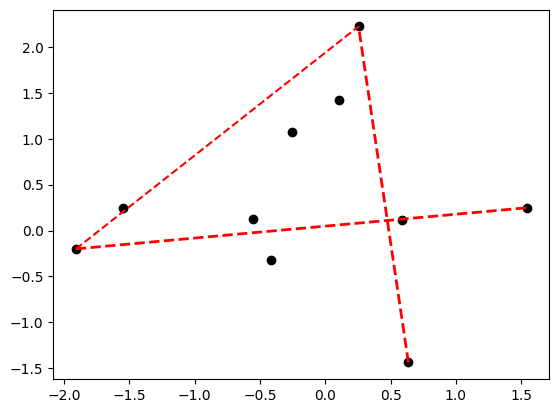

Number of comparisions in find_hull:  1


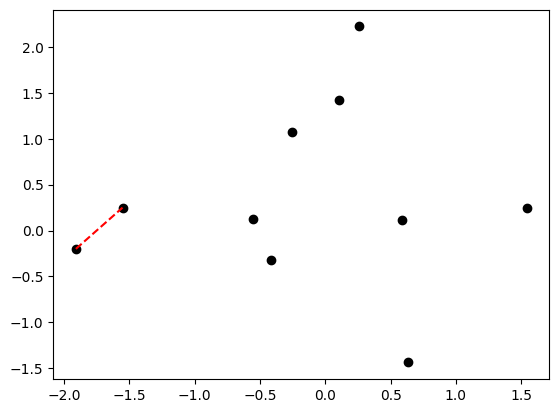

Number of comparisions in find_hull:  1


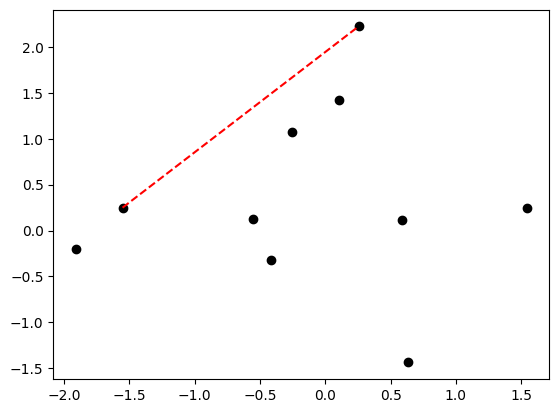

Number of comparisions in find_hull:  1


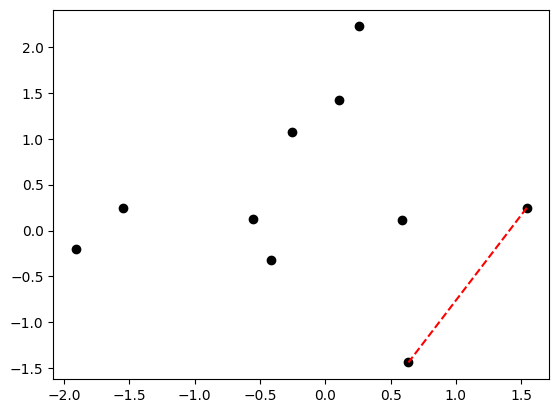

Number of comparisions in find_hull:  1


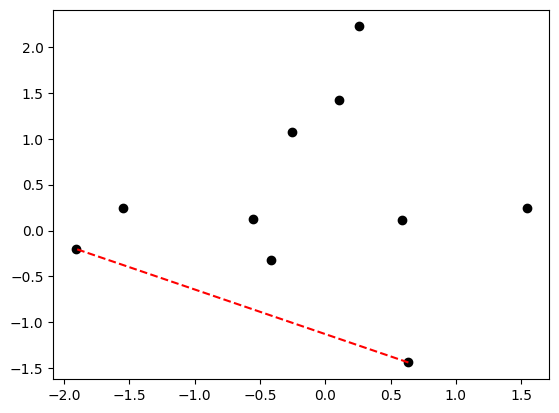

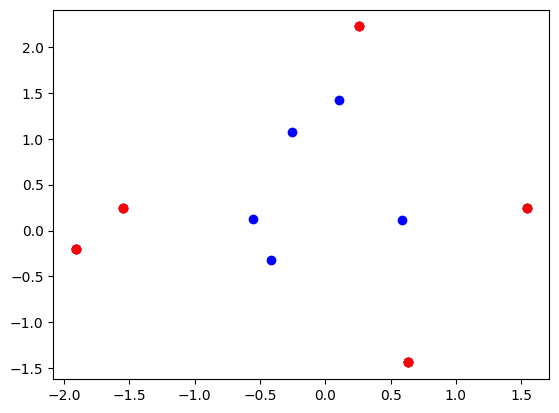

In [31]:
CH = []
Convex_Hull = convex_hull(Q,CH)
# print(Convex_Hull)
plot_points(Q,"blue")
plot_points(Convex_Hull,"red")
plt.show()

###### Author: Debapriya Das